In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from cycler import cycler
%matplotlib inline

# Absolute error

In [2]:
p_st = 3
p_end = 35
office_idt = np.empty([p_end-p_st, 18])
supermarket_idt = np.empty([p_end-p_st, 18])
office_ivt = np.empty([p_end-p_st, 18])
supermarket_ivt = np.empty([p_end-p_st, 18])
office_ivdt = np.empty([p_end-p_st, 18])
supermarket_ivdt = np.empty([p_end-p_st, 18])
for p in range(p_st, p_end):
    office_idt_acc = pd.read_csv(f"../param/exp_distance/idt_07deg_160ms_opt/{p}/result_office.csv")["error"].values
    supermarket_idt_acc = pd.read_csv(f"../param/exp_distance/idt_07deg_160ms_opt/{p}/result_supermarket.csv")["error"].values
    office_ivt_acc = pd.read_csv(f"../param/exp_distance/ivtl_80deg_160ms_opt/{p}/result_office.csv")["error"].values
    supermarket_ivt_acc = pd.read_csv(f"../param/exp_distance/ivtl_80deg_160ms_opt/{p}/result_supermarket.csv")["error"].values
    office_ivdt_acc = pd.read_csv(f"../param/exp_distance/ivdt_80deg_07deg_160ms_opt/{p}/result_office.csv")["error"].values
    supermarket_ivdt_acc = pd.read_csv(f"../param/exp_distance/ivdt_80deg_07deg_160ms_opt/{p}/result_supermarket.csv")["error"].values        

    # I-DT
    office_idt[p-p_st] = office_idt_acc
    supermarket_idt[p-p_st] = supermarket_idt_acc
    # I-VT
    office_ivt[p-p_st] = office_ivt_acc
    supermarket_ivt[p-p_st] = supermarket_ivt_acc
    # I-VDT
    office_ivdt[p-p_st] = office_ivdt_acc
    supermarket_ivdt[p-p_st] = supermarket_ivdt_acc

office_ivdt.shape

(32, 18)

In [3]:
# mean
office_idt_mean = np.mean(office_idt, axis=1)
supermarket_idt_mean = np.mean(supermarket_idt, axis=1)
office_ivt_mean = np.mean(office_ivt, axis=1)
supermarket_ivt_mean = np.mean(supermarket_ivt, axis=1)
office_ivdt_mean = np.mean(office_ivdt, axis=1)
supermarket_ivdt_mean = np.mean(supermarket_ivdt, axis=1)

# standard error
office_idt_se = np.std(office_idt, axis=1) / np.sqrt(office_idt.shape[1])
supermarket_idt_se = np.std(supermarket_idt, axis=1) / np.sqrt(supermarket_idt.shape[1])
office_ivt_se = np.std(office_ivt, axis=1) / np.sqrt(office_ivt.shape[1])
supermarket_ivt_se = np.std(supermarket_ivt, axis=1) / np.sqrt(supermarket_ivt.shape[1])
office_ivdt_se = np.std(office_ivdt, axis=1) / np.sqrt(office_ivdt.shape[1])
supermarket_ivdt_se = np.std(supermarket_ivdt, axis=1) / np.sqrt(supermarket_ivdt.shape[1])

office_ivdt_mean.shape

(32,)

## Office environment

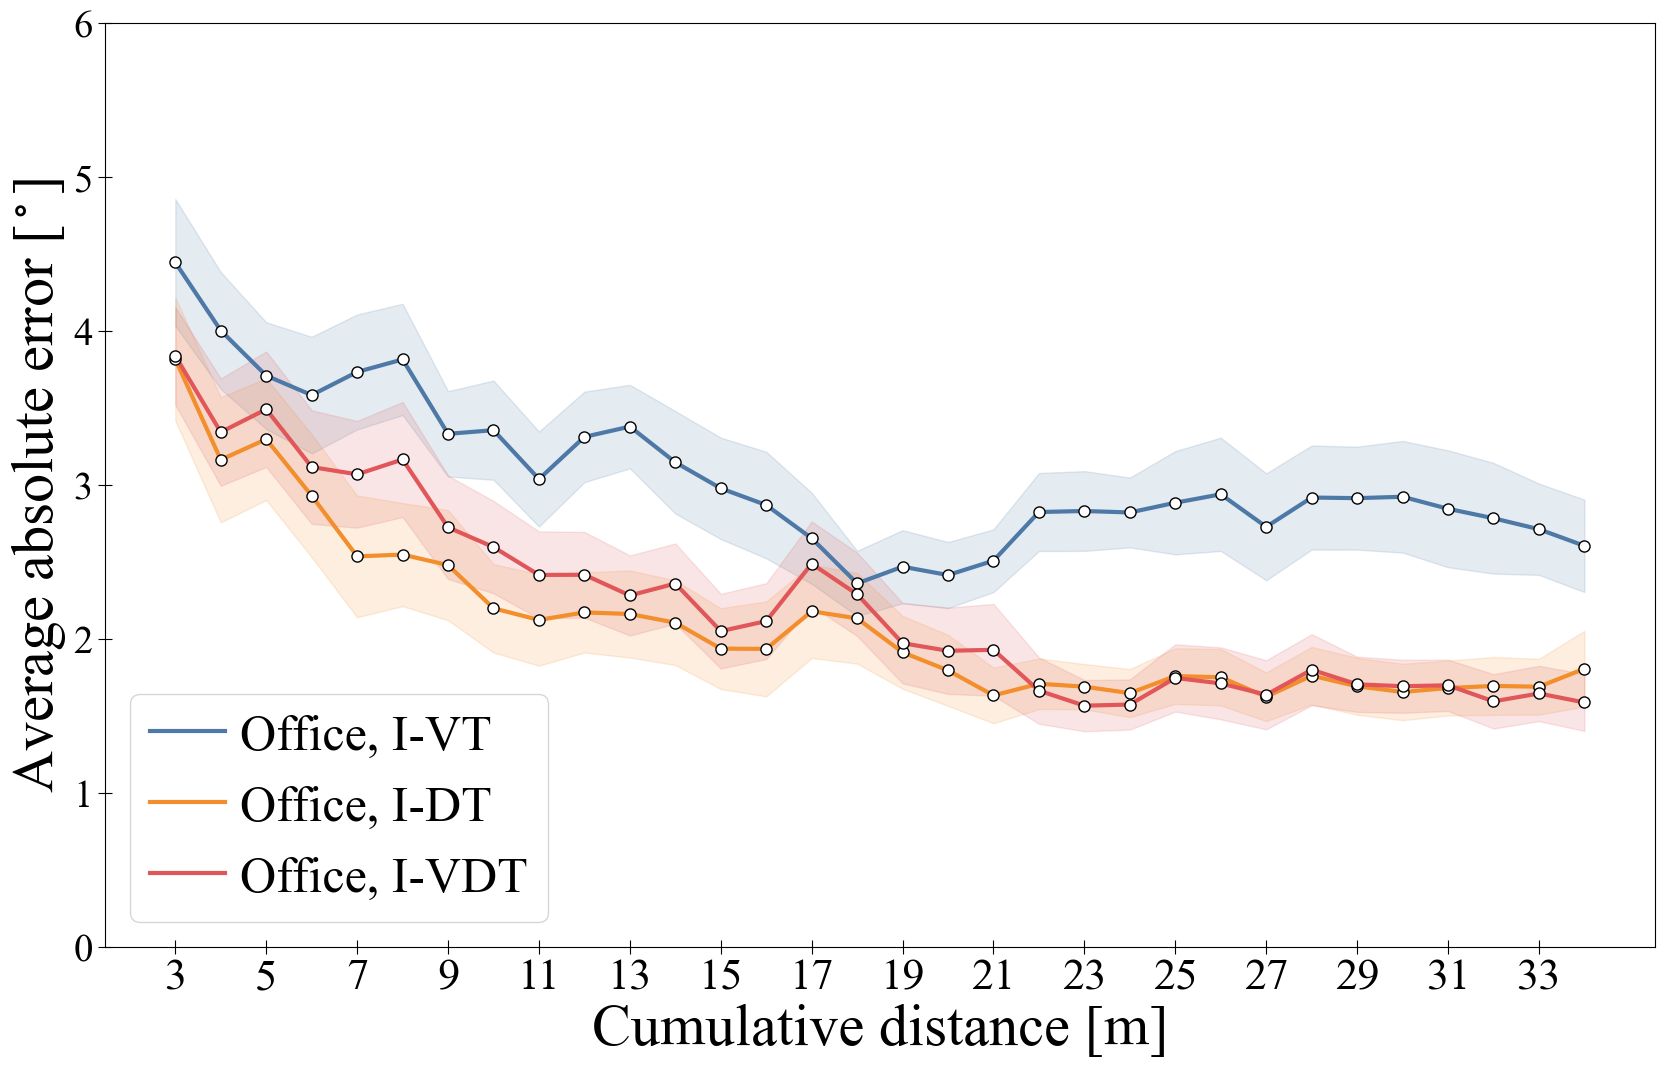

In [4]:
font_size = 42

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.prop_cycle']  = cycler(color=['#4E79A7', '#F28E2B', '#E15759', '#76B7B2','#59A14E', '#EDC949','#B07AA2','#FF9DA7','#9C755F','#BAB0AC'])
fig = plt.figure(figsize=(20, 12))
fig.patch.set_facecolor("white")

x_lis = range(p_st, p_end)
plt.plot(x_lis, office_ivt_mean, c="C0", label="Office, I-VT", linewidth=3)
plt.errorbar(x_lis, office_ivt_mean, fmt="o", color="white", markeredgecolor="k", ecolor="k", markersize=8)
plt.fill_between(x_lis, office_ivt_mean+office_ivt_se, office_ivt_mean-office_ivt_se, color="C0", alpha=0.15)

plt.plot(x_lis, office_idt_mean, c="C1", label="Office, I-DT", linewidth=3)
plt.errorbar(x_lis, office_idt_mean, fmt="o", color="white", markeredgecolor="k", ecolor="k", markersize=8)
plt.fill_between(x_lis, office_idt_mean+office_idt_se, office_idt_mean-office_idt_se, color="C1", alpha=0.15)

plt.plot(x_lis, office_ivdt_mean, c="C2", label="Office, I-VDT", linewidth=3)
plt.errorbar(x_lis, office_ivdt_mean, fmt="o", color="white", markeredgecolor="k", ecolor="k", markersize=8)
plt.fill_between(x_lis, office_ivdt_mean+office_ivdt_se, office_ivdt_mean-office_ivdt_se, color="C2", alpha=0.15)

plt.tick_params(direction = "inout", length=10)
plt.xticks([i for i in range(p_st, p_end, 2)], fontsize=32)
plt.yticks(fontsize=28)
plt.tick_params(direction = "inout", length=10)

plt.ylim(0.0, 6.0)
plt.xlabel("Cumulative distance [m]", size=font_size)
plt.ylabel(r"Average absolute error [$^\circ$]", size=font_size)
plt.legend(loc='lower left', ncol=1, handlelength=1.5, handletextpad=0.3, fontsize=36)
plt.savefig("../figures/dist_abs_result_office.png",bbox_inches='tight')

## Supermarket environment

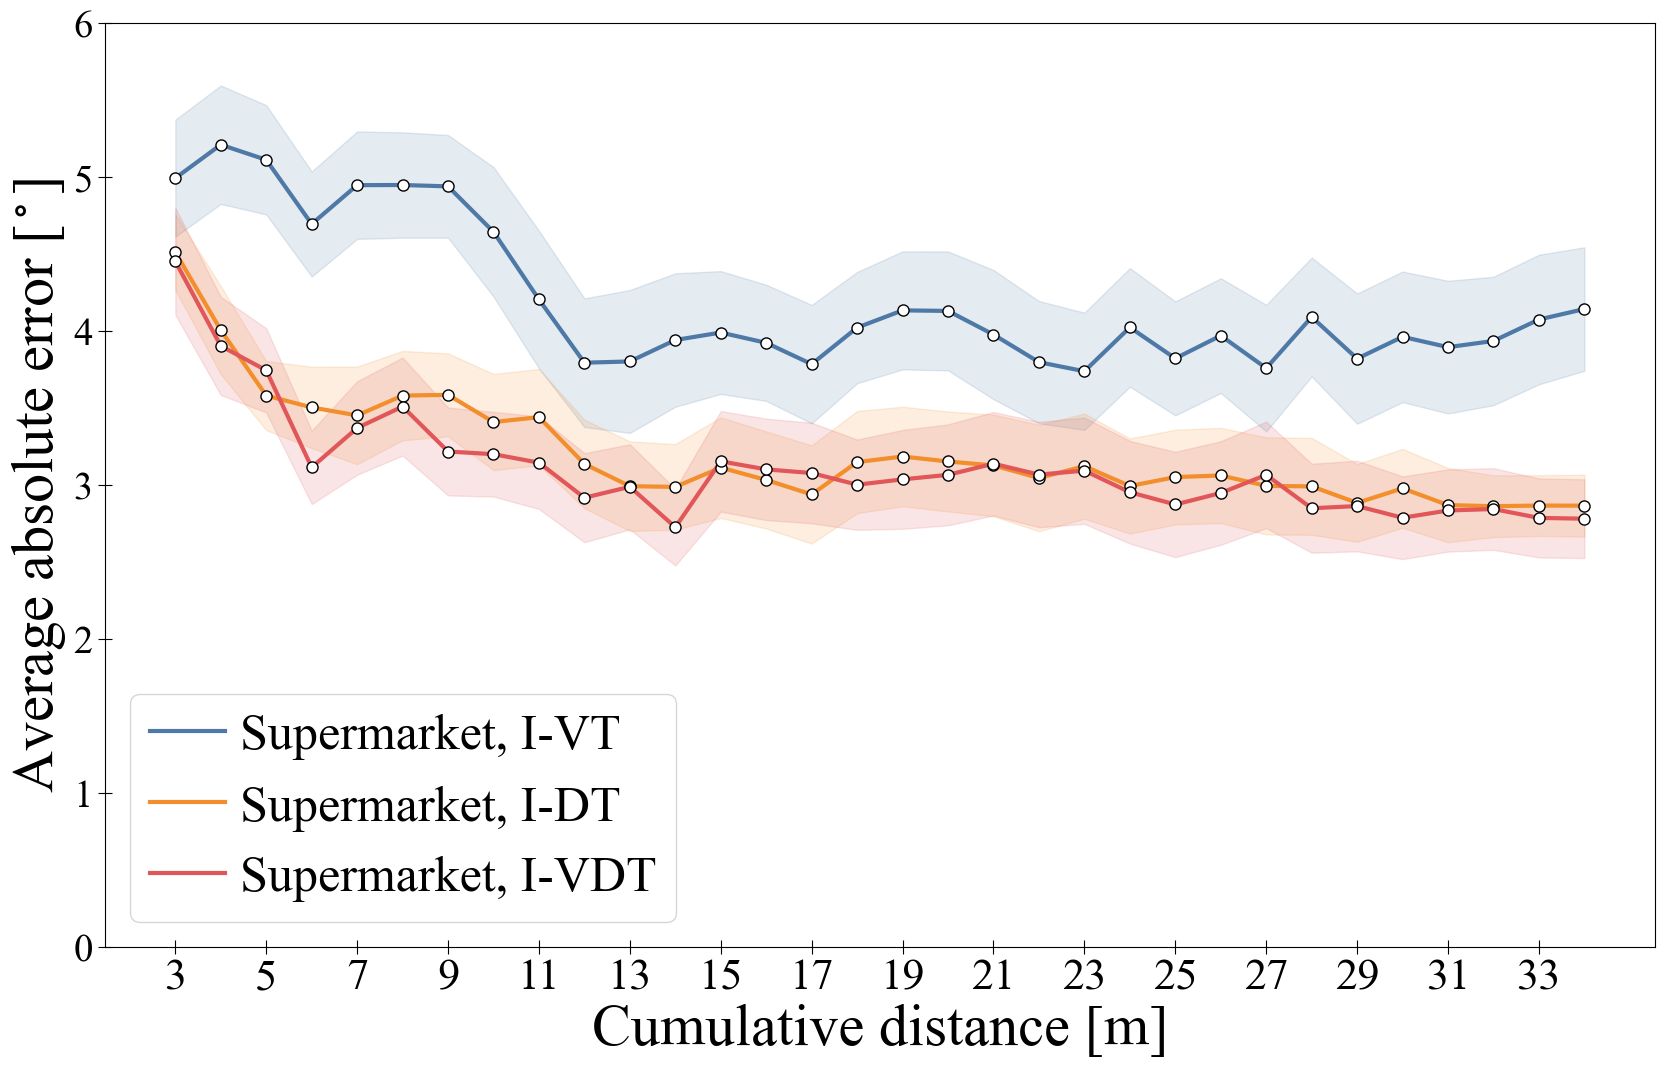

In [5]:
font_size = 42

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.prop_cycle']  = cycler(color=['#4E79A7', '#F28E2B', '#E15759', '#76B7B2','#59A14E', '#EDC949','#B07AA2','#FF9DA7','#9C755F','#BAB0AC'])
fig = plt.figure(figsize=(20, 12))
fig.patch.set_facecolor("white")

x_lis = range(p_st, p_end)
plt.plot(x_lis, supermarket_ivt_mean, c="C0", label="Supermarket, I-VT", linewidth=3)
plt.errorbar(x_lis, supermarket_ivt_mean, fmt="o", color="white", markeredgecolor="k", ecolor="k", markersize=8)
plt.fill_between(x_lis, supermarket_ivt_mean+supermarket_ivt_se, supermarket_ivt_mean-supermarket_ivt_se, color="C0", alpha=0.15)

plt.plot(x_lis, supermarket_idt_mean, c="C1", label="Supermarket, I-DT", linewidth=3)
plt.errorbar(x_lis, supermarket_idt_mean, fmt="o", color="white", markeredgecolor="k", ecolor="k", markersize=8)
plt.fill_between(x_lis, supermarket_idt_mean+supermarket_idt_se, supermarket_idt_mean-supermarket_idt_se, color="C1", alpha=0.15)

plt.plot(x_lis, supermarket_ivdt_mean, c="C2", label="Supermarket, I-VDT", linewidth=3)
plt.errorbar(x_lis, supermarket_ivdt_mean, fmt="o", color="white", markeredgecolor="k", ecolor="k", markersize=8)
plt.fill_between(x_lis, supermarket_ivdt_mean+supermarket_ivdt_se, supermarket_ivdt_mean-supermarket_ivdt_se, color="C2", alpha=0.15)

plt.tick_params(direction = "inout", length=10)
plt.xticks([i for i in range(p_st, p_end, 2)], fontsize=32)
plt.yticks(fontsize=28)
plt.tick_params(direction = "inout", length=10)

plt.ylim(0.0, 6.0)
plt.xlabel("Cumulative distance [m]", size=font_size)
plt.ylabel(r"Average absolute error [$^\circ$]", size=font_size)
plt.legend(loc='lower left', ncol=1, handlelength=1.5, handletextpad=0.3, fontsize=36)
plt.savefig("../figures/dist_abs_result_supermarket.png",bbox_inches='tight')

# Number of fixations

In [6]:
p_st = 3
p_end = 35
office_idt = np.empty([p_end-p_st, 18])
supermarket_idt = np.empty([p_end-p_st, 18])
office_ivt = np.empty([p_end-p_st, 18])
supermarket_ivt = np.empty([p_end-p_st, 18])
office_ivdt = np.empty([p_end-p_st, 18])
supermarket_ivdt = np.empty([p_end-p_st, 18])
for p in range(p_st, p_end):
    for i in range(18):
        office_idt_num = pd.read_csv(f"../param/exp_distance/fixation_result/office_idt_07deg_160ms_opt/{p}/office_user{i}.csv", header=None).values
        supermarket_idt_num = pd.read_csv(f"../param/exp_distance/fixation_result/supermarket_idt_07deg_160ms_opt/{p}/supermarket_user{i}.csv", header=None).values
        office_ivt_num = pd.read_csv(f"../param/exp_distance/fixation_result/office_ivtl_80deg_160ms_opt/{p}/office_user{i}.csv", header=None).values
        supermarket_ivt_num = pd.read_csv(f"../param/exp_distance/fixation_result/supermarket_ivtl_80deg_160ms_opt/{p}/supermarket_user{i}.csv", header=None).values
        office_ivdt_num = pd.read_csv(f"../param/exp_distance/fixation_result/office_ivdt_80deg_07deg_160ms_opt/{p}/office_user{i}.csv", header=None).values
        supermarket_ivdt_num = pd.read_csv(f"../param/exp_distance/fixation_result/supermarket_ivdt_80deg_07deg_160ms_opt/{p}/supermarket_user{i}.csv", header=None).values        

        # I-DT
        office_idt[p-p_st, i] = office_idt_num.shape[0]
        supermarket_idt[p-p_st, i] = supermarket_idt_num.shape[0]
        # I-VT
        office_ivt[p-p_st, i] = office_ivt_num.shape[0]
        supermarket_ivt[p-p_st, i] = supermarket_ivt_num.shape[0]
        # I-VDT
        office_ivdt[p-p_st, i] = office_ivdt_num.shape[0]
        supermarket_ivdt[p-p_st, i] = supermarket_ivdt_num.shape[0]

office_ivdt.shape

(32, 18)

In [7]:
# mean
office_idt_mean = np.mean(office_idt, axis=1)
supermarket_idt_mean = np.mean(supermarket_idt, axis=1)
office_ivt_mean = np.mean(office_ivt, axis=1)
supermarket_ivt_mean = np.mean(supermarket_ivt, axis=1)
office_ivdt_mean = np.mean(office_ivdt, axis=1)
supermarket_ivdt_mean = np.mean(supermarket_ivdt, axis=1)

# standard error
office_idt_se = np.std(office_idt, axis=1) / np.sqrt(office_idt.shape[1])
supermarket_idt_se = np.std(supermarket_idt, axis=1) / np.sqrt(supermarket_idt.shape[1])
office_ivt_se = np.std(office_ivt, axis=1) / np.sqrt(office_ivt.shape[1])
supermarket_ivt_se = np.std(supermarket_ivt, axis=1) / np.sqrt(supermarket_ivt.shape[1])
office_ivdt_se = np.std(office_ivdt, axis=1) / np.sqrt(office_ivdt.shape[1])
supermarket_ivdt_se = np.std(supermarket_ivdt, axis=1) / np.sqrt(supermarket_ivdt.shape[1])

office_ivdt_mean.shape

(32,)

## Office environment

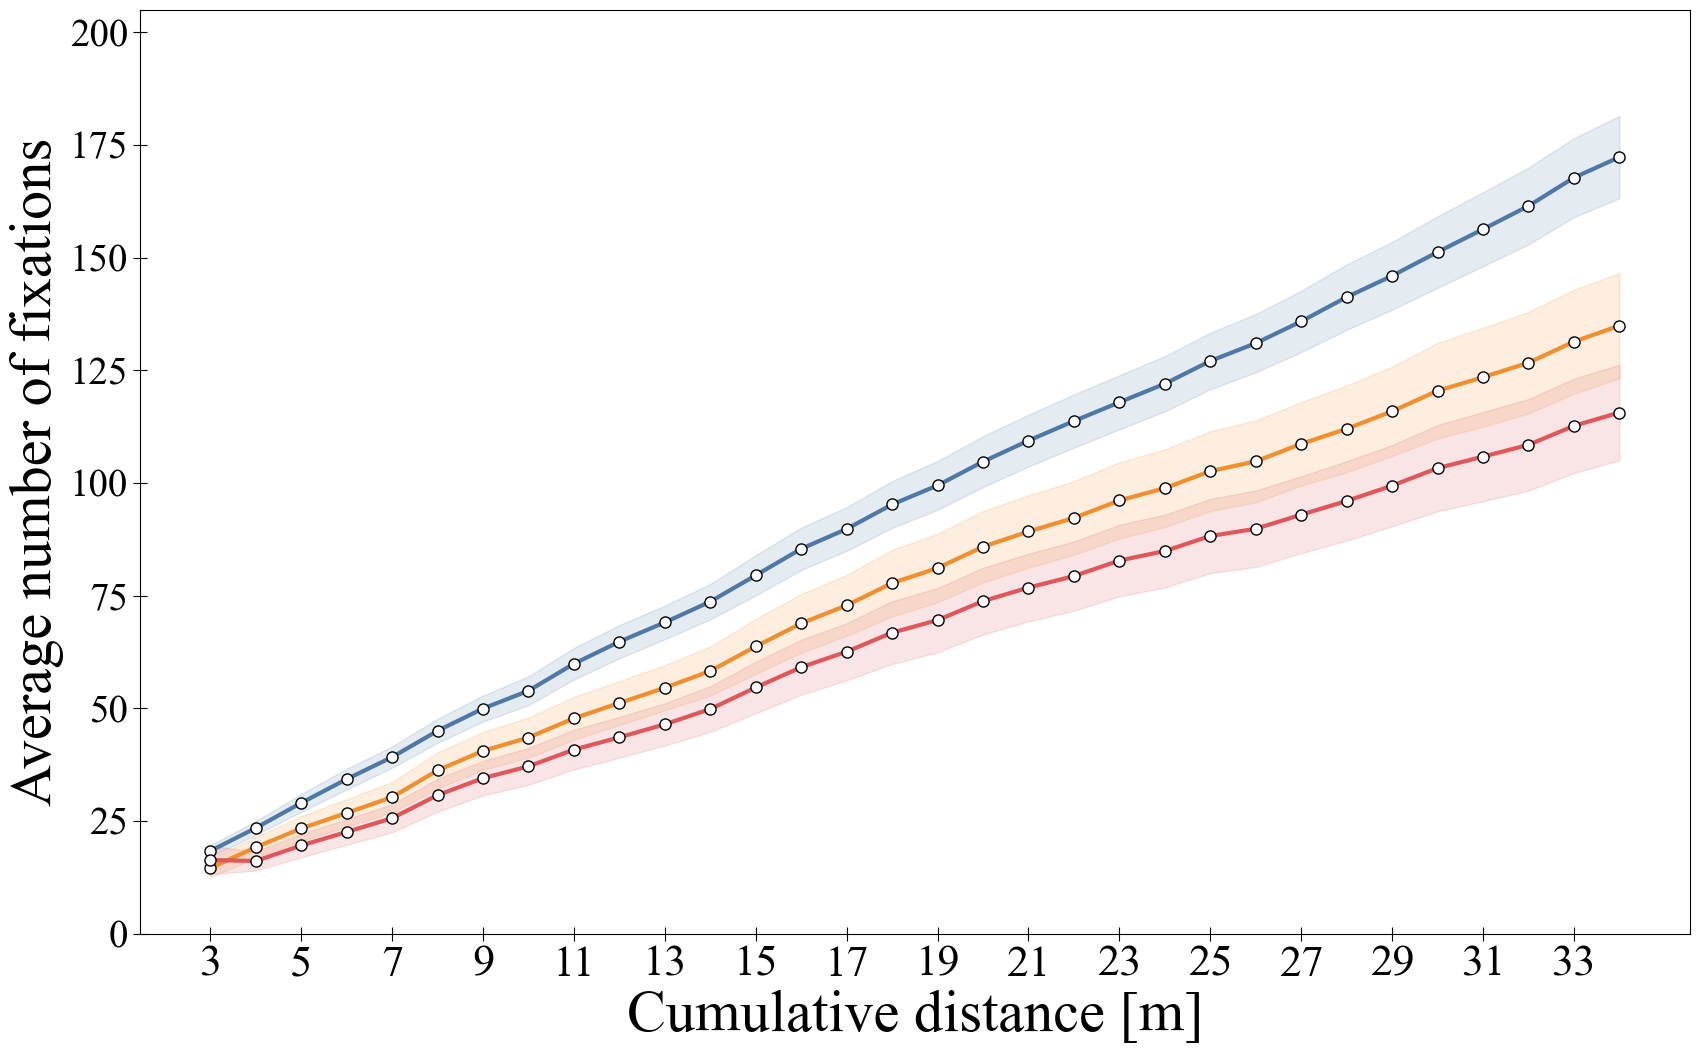

In [8]:
font_size = 42

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.prop_cycle']  = cycler(color=['#4E79A7', '#F28E2B', '#E15759', '#76B7B2','#59A14E', '#EDC949','#B07AA2','#FF9DA7','#9C755F','#BAB0AC'])
fig = plt.figure(figsize=(20, 12))
fig.patch.set_facecolor("white")

x_lis = range(p_st, p_end)
plt.plot(x_lis, office_ivt_mean, c="C0", label="Office, I-VT", linewidth=3)
plt.errorbar(x_lis, office_ivt_mean, fmt="o", color="white", markeredgecolor="k", ecolor="k", markersize=8)
plt.fill_between(x_lis, office_ivt_mean+office_ivt_se, office_ivt_mean-office_ivt_se, color="C0", alpha=0.15)

plt.plot(x_lis, office_idt_mean, c="C1", label="Office, I-DT", linewidth=3)
plt.errorbar(x_lis, office_idt_mean, fmt="o", color="white", markeredgecolor="k", ecolor="k", markersize=8)
plt.fill_between(x_lis, office_idt_mean+office_idt_se, office_idt_mean-office_idt_se, color="C1", alpha=0.15)

plt.plot(x_lis, office_ivdt_mean, c="C2", label="Office, I-VDT", linewidth=3)
plt.errorbar(x_lis, office_ivdt_mean, fmt="o", color="white", markeredgecolor="k", ecolor="k", markersize=8)
plt.fill_between(x_lis, office_ivdt_mean+office_ivdt_se, office_ivdt_mean-office_ivdt_se, color="C2", alpha=0.15)

plt.tick_params(direction = "inout", length=10)
plt.xticks([i for i in range(p_st, p_end, 2)], fontsize=32)
plt.yticks(fontsize=28)
plt.tick_params(direction = "inout", length=10)

plt.ylim(0.0, 205)
plt.xlabel("Cumulative distance [m]", size=font_size)
plt.ylabel("Average number of fixations", size=font_size)
plt.savefig("../figures/dist_num_result_office.png",bbox_inches='tight')

## Supermarket environment

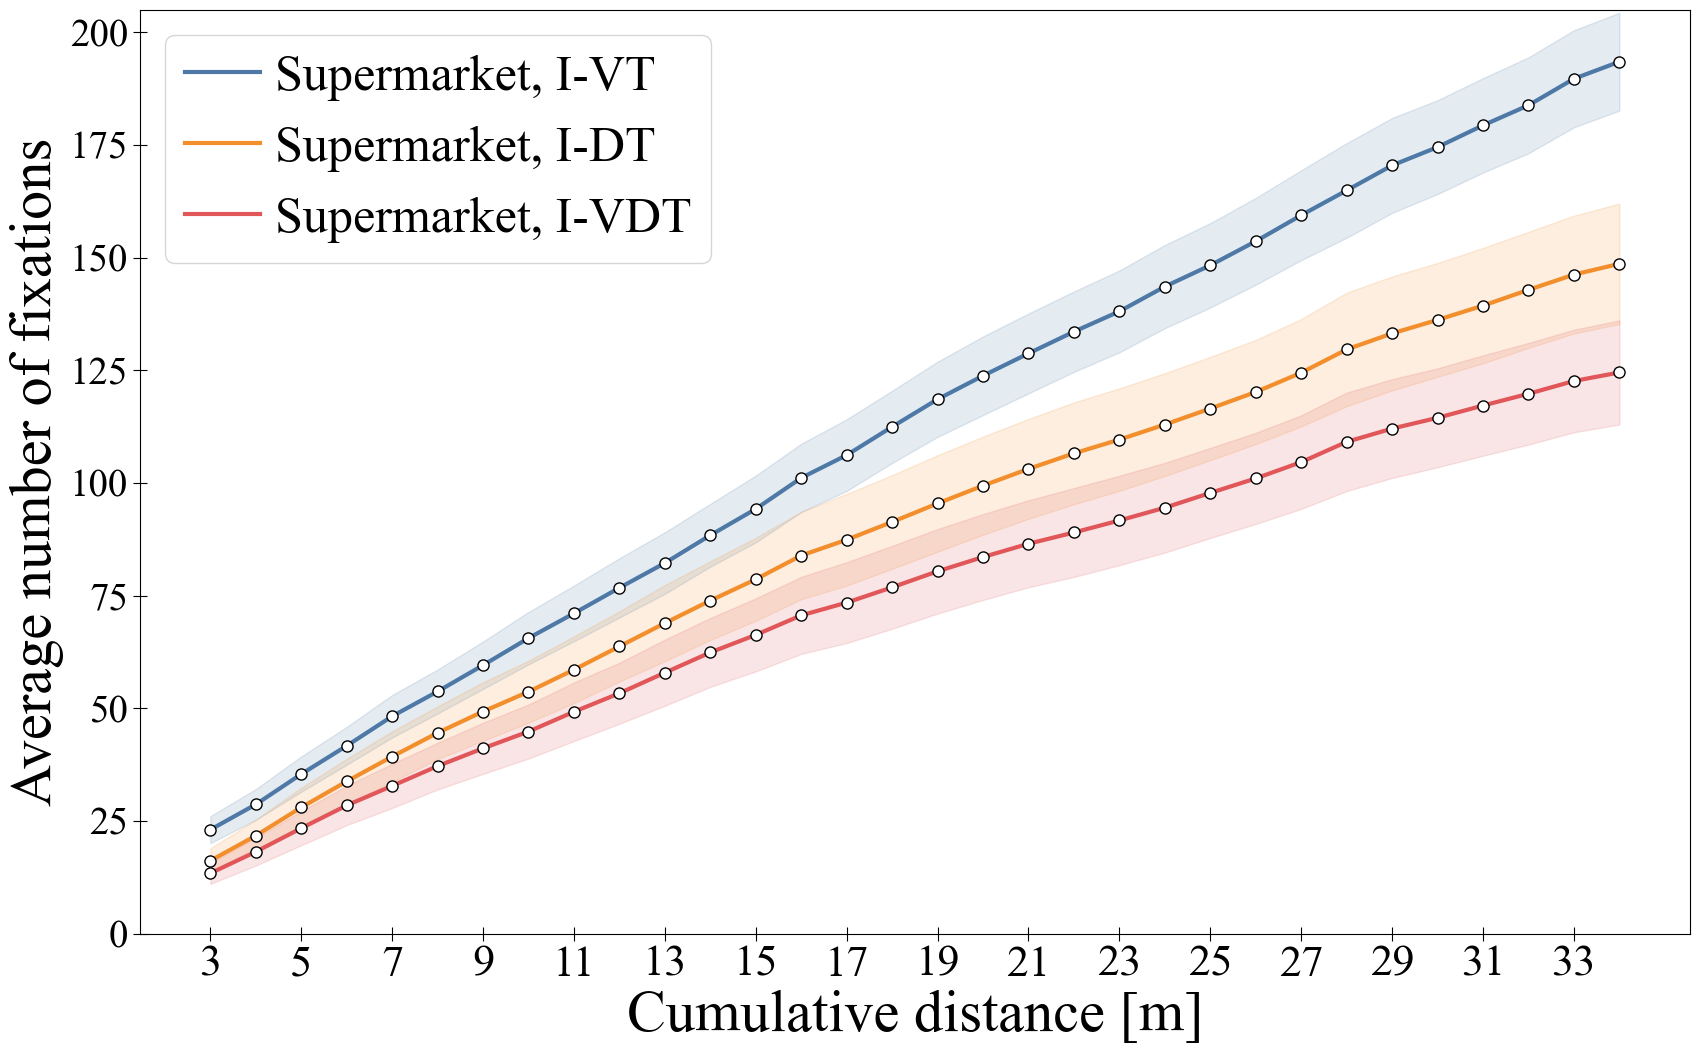

In [9]:
font_size = 42

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.prop_cycle']  = cycler(color=['#4E79A7', '#F28E2B', '#E15759', '#76B7B2','#59A14E', '#EDC949','#B07AA2','#FF9DA7','#9C755F','#BAB0AC'])
fig = plt.figure(figsize=(20, 12))
fig.patch.set_facecolor("white")

x_lis = range(p_st, p_end)
plt.plot(x_lis, supermarket_ivt_mean, c="C0", label="Supermarket, I-VT", linewidth=3)
plt.errorbar(x_lis, supermarket_ivt_mean, fmt="o", color="white", markeredgecolor="k", ecolor="k", markersize=8)
plt.fill_between(x_lis, supermarket_ivt_mean+supermarket_ivt_se, supermarket_ivt_mean-supermarket_ivt_se, color="C0", alpha=0.15)

plt.plot(x_lis, supermarket_idt_mean, c="C1", label="Supermarket, I-DT", linewidth=3)
plt.errorbar(x_lis, supermarket_idt_mean, fmt="o", color="white", markeredgecolor="k", ecolor="k", markersize=8)
plt.fill_between(x_lis, supermarket_idt_mean+supermarket_idt_se, supermarket_idt_mean-supermarket_idt_se, color="C1", alpha=0.15)

plt.plot(x_lis, supermarket_ivdt_mean, c="C2", label="Supermarket, I-VDT", linewidth=3)
plt.errorbar(x_lis, supermarket_ivdt_mean, fmt="o", color="white", markeredgecolor="k", ecolor="k", markersize=8)
plt.fill_between(x_lis, supermarket_ivdt_mean+supermarket_ivdt_se, supermarket_ivdt_mean-supermarket_ivdt_se, color="C2", alpha=0.15)

plt.tick_params(direction = "inout", length=10)
plt.xticks([i for i in range(p_st, p_end, 2)], fontsize=32)
plt.yticks(fontsize=28)
plt.tick_params(direction = "inout", length=10)

plt.ylim(0.0, 205)
plt.xlabel("Cumulative distance [m]", size=font_size)
plt.ylabel("Average number of fixations", size=font_size)
plt.legend(loc='upper left', ncol=1, handlelength=1.5, handletextpad=0.3, fontsize=36)
plt.savefig("../figures/dist_num_result_supermarket.png",bbox_inches='tight')